In [1]:
import sys


PACKAGE_PARENT = '../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.evaluate.eval_agents import EvaluateGameSA
from alphaslime.agents.other.semiGradSarsa import SemiGradSarsa
from alphaslime.approx.linearq import LinearQApprox

from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gym
import csv

import time

In [2]:
# config intial properties

env_id = 'CartPole-v0'
env = gym.make(env_id)
# seed the random numbers and the gym environment
# seed = 42
seed = int(time.time()) #1630937434
np.random.seed(seed)    
env.seed(seed)

# agent properties
alpha = 0.1 # step size
epsilon = 1
gamma = 0.95
training_episodes = 1000
observation_dimension=4
action_table = [0, 1]


# q function approximator
q_hat = LinearQApprox()

# set config file for agent
config = {
    'alpha': None,
    'gamma': gamma,
    'epsilon': epsilon,
    'action_table': action_table,
    'd': observation_dimension,
    't_max': 500,
    'max_score': 500,
    'episode_printer': 100,
    'env': env,
    'weights':None,
    'q_hat': q_hat
}



In [3]:
# we want to determine the best alpha value
# so iterate alpha
# then train, then determine average score per alpha

# function for saving weights to disk
def save_weight(index, weights):
    path = './train/sarsa/weights/'
    file_name = 'weights_alpha' + str(index) + '.csv'
    path += file_name
    with open(path, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)

        # write the header
        # writer.writerow(np.array([alpha]))

        # write multiple rows
        writer.writerows(weights)

In [4]:
# create alpha list
alphas = np.arange(0.1,1,0.05)

# testing trails
trails = 100

average_rewards = []

# configure evaluation test
base_dir = './'
RENDER = False

agent_rewards = np.zeros((trails,))

# weight data store path
path = './train/sarsa/weights_alpha.csv'

In [5]:
# train for different alpha values
for index, alpha in enumerate(alphas):
    print('Training agent for alpha = {}'.format(alpha))

    # set config file
    config['alpha'] = alpha
    config['epsilon'] = epsilon

    # init agent
    agent = SemiGradSarsa(config)

    # train agent
    agent.train(episodes=training_episodes)

    # get trained weight value
    weights = agent.w

    # save weights
    # TODO: use a thread for write operation
    save_weight(index, weights)
    # d = {str(alpha): weights}
    # df = pd.DataFrame(d)
    # df.to_csv(path, mode='a')

    # determine average score per episode
    eval_game = EvaluateGameSA(agent=agent, base_dir_path=base_dir, render=RENDER, env=env)
    agent.epsilon = 0 # make greedy actions
    for episode in range(trails):
        reward = eval_game.evaluate_episode()
        agent_rewards[episode] = reward
    
    # store average reward
    average_rewards.append(np.mean(agent_rewards))

average_rewards = np.array(average_rewards)

    
    

Training agent for alpha = 0.1
Training agent for alpha = 0.15000000000000002
Training agent for alpha = 0.20000000000000004
Training agent for alpha = 0.25000000000000006
Training agent for alpha = 0.30000000000000004
Training agent for alpha = 0.3500000000000001
Training agent for alpha = 0.40000000000000013
Training agent for alpha = 0.45000000000000007
Training agent for alpha = 0.5000000000000001
Training agent for alpha = 0.5500000000000002
Training agent for alpha = 0.6000000000000002
Training agent for alpha = 0.6500000000000001
Training agent for alpha = 0.7000000000000002
Training agent for alpha = 0.7500000000000002
Training agent for alpha = 0.8000000000000002


/home/joker/dev/skrip/other/cartpole/../../alphaslime/agents/other/semiGradSarsa.py:134: RuntimeWarning: overflow encountered in multiply
  self.alpha*beta*grad_q_hat.reshape((-1))
/home/joker/dev/skrip/other/cartpole/../../alphaslime/agents/other/semiGradSarsa.py:164: RuntimeWarning: invalid value encountered in subtract
  delta = (reward + self.gamma*q_hat_next - q_hat)


Training agent for alpha = 0.8500000000000002
Training agent for alpha = 0.9000000000000002


/home/joker/dev/skrip/other/cartpole/../../alphaslime/agents/other/semiGradSarsa.py:166: RuntimeWarning: invalid value encountered in add
  self.w[:, action_index] = self.w[:, action_index] + \


Training agent for alpha = 0.9500000000000003


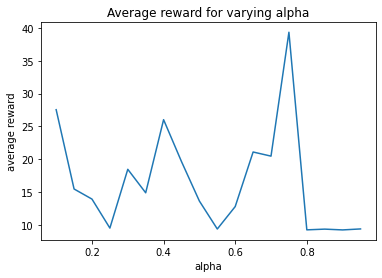

In [6]:
# plot average reward per alpha
plt.plot(alphas, average_rewards)
plt.xlabel('alpha')
plt.ylabel('average reward')
plt.title('Average reward for varying alpha')
plt.show()

In [7]:
index_max = np.argmax(average_rewards)

print('Optimal alpha value for gamma = {}: alpha = {}'.format(gamma, alphas[index_max]))

Optimal alpha value for gamma = 0.95: alpha = 0.7500000000000002


In [8]:
# gamma = 0.95, alpha = 0.35

# train agent with these alpha values


# change seed
seed_old = seed
seed = int(time.time())
np.random.seed(seed)    
env.seed(seed)

# config['alpha'] = alphas[index_max]
config['alpha'] = 0.95

# create new agent
optimal_agent = SemiGradSarsa(config)

# train agent
print('training')
trained_agent = optimal_agent.train(training_episodes)
print('training complete')

weights = trained_agent.w
epsilon = trained_agent.epsilon

print('weights = {}'.format(weights))
print('epsilon = {}'.format(epsilon))

training


/home/joker/dev/skrip/other/cartpole/../../alphaslime/agents/other/semiGradSarsa.py:166: RuntimeWarning: overflow encountered in add
  self.w[:, action_index] = self.w[:, action_index] + \
/home/joker/dev/skrip/other/cartpole/../../alphaslime/agents/other/semiGradSarsa.py:133: RuntimeWarning: invalid value encountered in add
  self.w[:, action_index] = self.w[:, action_index] + \


training complete
weights = [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
epsilon = 0.04971221948160023


In [9]:
# now evaulate trained agent
# determine average score per episode

eval_game = EvaluateGameSA(agent=trained_agent, base_dir_path=base_dir, render=RENDER, env=env)
trained_agent.epsilon = 0 # make greedy actions
for episode in range(trails):
    reward = eval_game.evaluate_episode()
    agent_rewards[episode] = reward



In [10]:
# store average reward
average_reward = np.mean(agent_rewards)

average_rewards = np.array(average_rewards)

print('Average reward after {} trials is: {}'.format(trails, np.mean(average_rewards)))

Average reward after 100 trials is: 16.627222222222226


# lets try a different approach

In [11]:
# we just want to see if we implemented the right code

In [12]:
# links:

https://www.martinholub.com/eth/code/2018/07/14/ReinforcementLearning.html

https://ikvibhav.medium.com/open-aigym-simple-sarsa-and-q-learning-reinforcement-learning-implementations-7d5ea6f1ff9

In [13]:
# from sources
epsilon = 0.2
gamma  = 0.95
alpha = 0.1

# q function approximator
q_hat = LinearQApprox()
env = gym.make('CartPole-v0')
# set config file for agent
config = {
    'alpha': alpha,
    'gamma': gamma,
    'epsilon': epsilon,
    'action_table': action_table,
    'd': observation_dimension,
    't_max': 200,
    'max_score': 200,
    'episode_printer': 100,
    'env': env,
    'weights':None,
    'q_hat': q_hat
}

In [14]:
# init the agent
agent = SemiGradSarsa(config)

num_episodes = 1000
# train the agent
trained_agent = agent.train(num_episodes)

# get training data
training_data = np.array(trained_agent.train_data)



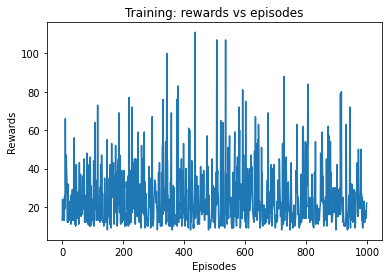

In [22]:
# plot training data
n, d = training_data.shape

episodes = np.arange(n)
# plot the training rewards 
plt.plot(episodes, training_data[:,0])
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Training: rewards vs episodes')
plt.show()


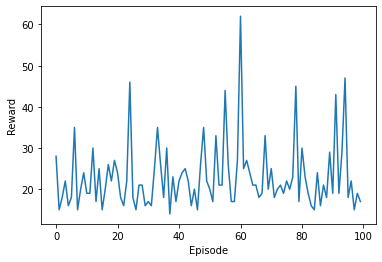

In [16]:
eval_game = EvaluateGameSA(agent=trained_agent, base_dir_path=base_dir, render=RENDER, env=env)
trained_agent.epsilon = 0 # make greedy actions
for episode in range(trails):
    reward = eval_game.evaluate_episode()
    agent_rewards[episode] = reward

# plot rewards per episode

episodes = np.arange(trails)
plt.plot(episodes, agent_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()